# Exercise 2: Sinusoids and the DFT


### Relevant Concepts

A real sinusoid in discrete time domain can be expressed by:

\begin{equation}
x[n] = A\cos(2 \pi fnT + \varphi)
\end{equation}

where, $x$ is the array of real values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $f$ is the frequency value of the sinusoid in Hz, $T$ is the sampling period equal to $1/fs$, fs is the sampling frequency in Hz, and $\varphi$ is the initial phase of the sinusoid in radians.

A complex sinusoid in discrete time domain can be expressed by:

\begin{equation}
\bar{x}[n] = Ae^{j(\omega nT + \varphi)} = A\cos(\omega nT + \varphi)+ j A\sin(\omega nT + \varphi)
\end{equation}

where, $\bar{x}$ is the array of complex values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $e$ is the complex exponential number, $\omega$ is the frequency of the sinusoid in radians per second (equal to $2 \pi f$), $T$ is the sampling period equal $1/fs$, fs is the sampling frequency in Hz and $\varphi$ is the initial phase of the sinusoid in radians.

The $N$ point DFT of a sequence of real values $x$ (a sound) can be expressed by:

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n]e^{-j2 \pi kn/N}  \hspace{1cm} k=0,...,N-1
\end{equation}

where $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the DFT.

The IDFT of a spectrum $X$ of length $N$ can be expressed by:

\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]e^{j2 \pi kn/N}  \hspace{1cm} n=0,...,N-1
\end{equation}

where, $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the spectrum $X$.

The magnitude of a complex spectrum $X$ is obtained by taking its absolute value: $|X[k]| $


## Part 1 - Generate a sinusoid

The function `gen_sine()`  generates a real sinusoid (use `np.cos()`) given its amplitude `A`, frequency `f` (Hz), initial phase `phi` (radians), sampling rate `fs` (Hz) and duration `t` (seconds). 

All the input arguments to this function `(A, f, phi, fs and t)` are real numbers such that `A`, `t` and `fs` are positive, and `fs > 2*f` to avoid aliasing. The function should return a numpy array `x` of the generated sinusoid. 



In [2]:
import numpy as np

In [ ]:


def gen_sine(A, f, phi, fs, t):
    """Generate a real sinusoid given its amplitude, frequency, initial phase, sampling rate, and duration.
    
    Args:
        A (float):  amplitude of the sinusoid
        f (float): frequency of the sinusoid in Hz
        phi (float): initial phase of the sinusoid in radians
        fs (float): sampling frequency of the sinusoid in Hz
        t (float): duration of the sinusoid (is second)
        
    Returns:
        np.array: array containing generated sinusoid
        
    """
    # Calculate the total number of samples
    num_samples = int(fs * t)

    # Generate the time values for the samples
    time_values = np.arange(0, t, 1/fs)[:num_samples]

    # Generate the sinusoid
    sinusoid = A * np.cos(2 * np.pi * f * time_values + phi)

    return sinusoid

    

[ 0.54030231 -0.63332387 -0.93171798  0.05749049  0.96724906]


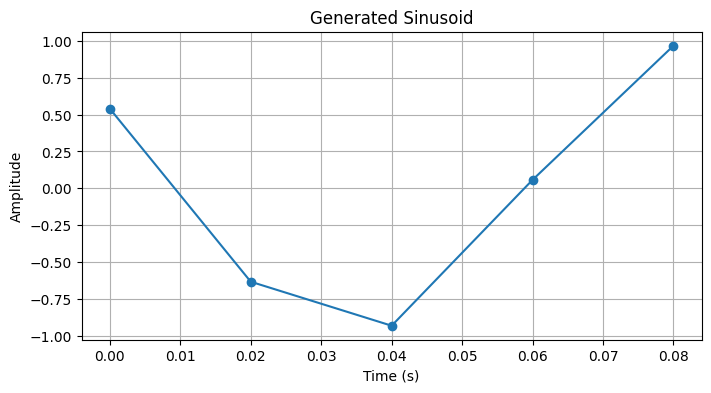

In [ ]:

import matplotlib.pyplot as plt
import IPython.display as ipd
A = 1
f = 10
phi=1
fs=50
t=0.1

sinusoid = gen_sine(A, f, phi, fs, t)
print(sinusoid)

# Plot the sinusoid
plt.figure(figsize=(8, 4))
time_values = np.arange(0, t, 1/fs)[:len(sinusoid)]
plt.plot(time_values, sinusoid, marker='o')
plt.title("Generated Sinusoid")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



In [5]:
A = 1
f = 440
phi=1
fs=5000
t=0.5

sinusoid = gen_sine(A, f, phi, fs, t)
print(sinusoid)

ipd.display(ipd.Audio(sinusoid, rate=int(fs)))

[ 0.54030231  0.01787507 -0.50987914 ...  0.79075133  0.99440411
  0.90171349]


## Part 2 - Generate a complex sinusoid 

The `gen_complex_sine()` function generate the complex sinusoid that is used in DFT computation of length `N` (samples), corresponding to the frequency index `k`. [Note that in the DFT we use the conjugate of this complex sinusoid.]

The amplitude of such a complex sinusoid is `1`, the length is `N`, and the frequency in radians is `2*pi*k/N`.

The input arguments to the function are two positive integers, `k` and `N`, such that `k < N-1`. The function returns `c_sine`, a numpy array of the complex sinusoid. 

In [ ]:


def gen_complex_sine(k, N):
    """Generate one of the complex sinusoids used in the DFT from its frequency index and the DFT lenght.
    
    Args:
        k (integer): frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid, DFT length, in samples
        
    Returns:
        np.array: array with generated complex sinusoid (length N)
        
    """
    n = np.arange(N)

    # Generate the complex sinusoid
    complex_sinusoid = np.exp(1j * 2 * np.pi * k * n / N)

    return complex_sinusoid


[ 1.        +0.j          0.30901699+0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j  0.30901699-0.95105652j]


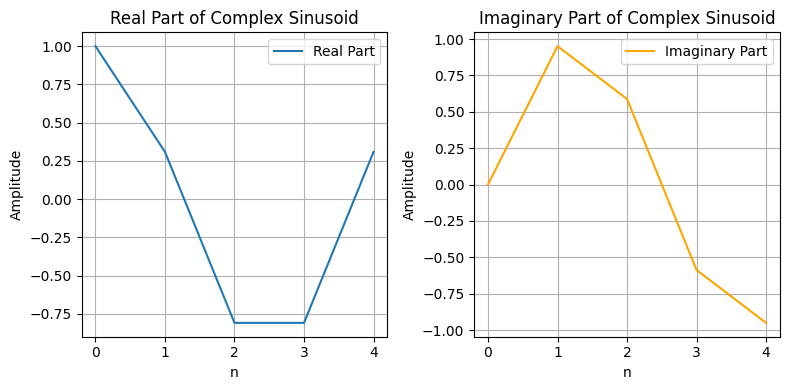

In [ ]:


k = 1
N = 5
complex_sinusoid = gen_complex_sine(k, N)
print(complex_sinusoid)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(np.real(complex_sinusoid), label="Real Part")
plt.title('Real Part of Complex Sinusoid')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(np.imag(complex_sinusoid), label="Imaginary Part", color='orange')
plt.title('Imaginary Part of Complex Sinusoid')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Part 3 - Implement the discrete Fourier transform (DFT)

The function `dft()`  implements the discrete Fourier transform (DFT) equation given above. Given a sequence `x` of length `N`, the function should return its spectrum of length `N` with the frequency indexes ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function returns a numpy array `X`, the DFT of `x`.

In [8]:
# E2 - 3.1: Complete the function dft()

def dft(x):
    """Compute the DFT of a signal.
    
    Args:
        x (numpy array): input sequence of length N
        
    Returns:
        np.array: N point DFT of the input sequence x
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)  # Initialize output array

    # Perform the DFT calculation
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)

    return X

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


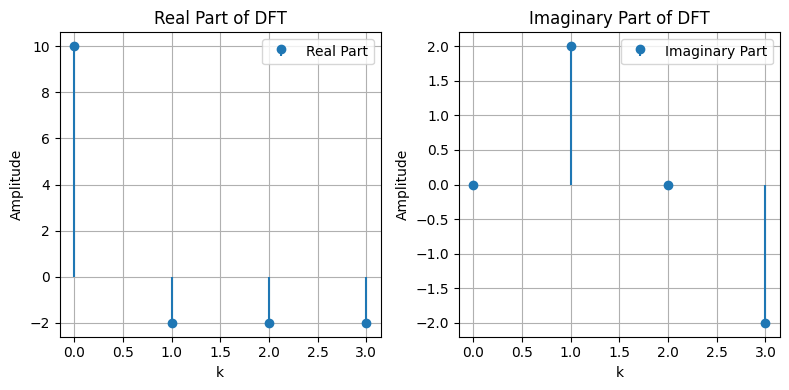

In [ ]:


x = np.array([1, 2, 3, 4])  # Example input
X = dft(x)
print(X)


plt.figure(figsize=(8, 4))

# Real part plot
plt.subplot(1, 2, 1)
plt.stem(np.real(X), basefmt=" ", label="Real Part")
plt.title('Real Part of DFT')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Imaginary part plot
plt.subplot(1, 2, 2)
plt.stem(np.imag(X), basefmt=" ", label="Imaginary Part")
plt.title('Imaginary Part of DFT')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Part 4 - Implement the inverse discrete Fourier transform (IDFT)

The function `idft()`  implements the inverse discrete Fourier transform (IDFT) equation given above. Given a frequency spectrum `X` of length `N`, the function should return its IDFT `x`, also of length `N`. Assume that the frequency index of the input spectrum ranges from 0 to `N-1`.

The input argument to the function is a numpy array `X` of the frequency spectrum and the function returns a numpy array of the IDFT of `X`.



In [ ]:


def idft(X):
    """Compute the inverse-DFT of a spectrum.
    
    Args:
        X (np.array): frequency spectrum (length N)
        
    Returns:
        np.array: N point IDFT of the frequency spectrum X
        
    """
    N = len(X)
    x = np.zeros(N, dtype=complex)  # Initialize output array

    # Perform the IDFT calculation
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)

    x = x / N  # Normalize the result

    return x


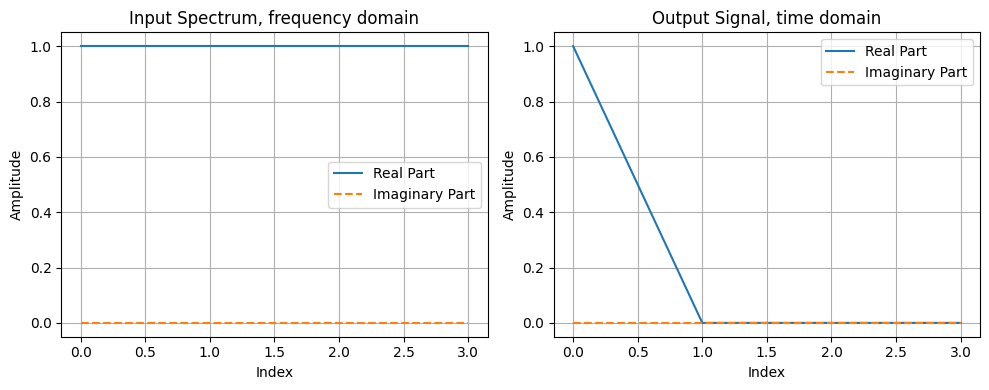

Time domain signal: [ 1.00000000e+00+0.00000000e+00j -4.59242550e-17+5.55111512e-17j
  0.00000000e+00+6.12323400e-17j  8.22616137e-17+8.32667268e-17j]
reconstructed signal, frequency domain: [1.+2.00010218e-16j 1.+6.69535287e-17j 1.-7.75455381e-17j
 1.-1.89418209e-16j]


In [ ]:

X = np.array([1, 1, 1, 1])

# Plot real and imaginary parts of the input spectrum
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.real(X), label="Real Part")
plt.plot(np.imag(X), label="Imaginary Part", linestyle="--")
plt.title('Input Spectrum, frequency domain')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Compute the IDFT of X
x= idft(X)

# Plot real and imaginary parts of the output signal
plt.subplot(1, 2, 2)
plt.plot(np.real(x), label="Real Part")
plt.plot(np.imag(x), label="Imaginary Part", linestyle="--")
plt.title('Output Signal, time domain')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Validate by computing the IDFT of the reconstructed signal
x_reconstructed = dft(x)

# Print the reconstructed signal and the result of IDFT on the reconstructed signal
print("Time domain signal:", x)
print("reconstructed signal, frequency domain:", x_reconstructed)




In [12]:
# Additional test
x = np.array([1, 2, 3, 4]) 
X = dft(x)  # Compute DFT
x_reconstructed = idft(X)  # Compute IDFT

print("Reconstructed sequence", x_reconstructed)
#we get very small numerical values of the order of 1e-15, which can be ignored


Reconstructed sequence [1.-5.55111512e-16j 2.-2.77555756e-16j 3.-1.11022302e-16j
 4.+2.77555756e-16j]


## Part 5 - Compute the magnitude spectrum

The function `gen_mag_spectrum()`  computes the magnitude spectrum of an input sequence `x` of length `N`. The function should return an `N` point magnitude spectrum with frequency index ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function returns a numpy array of the magnitude spectrum of `x`.

In [ ]:


def gen_mag_spec(x):
    """Compute magnitude spectrum of a signal.
    
    Args:
        x (np.array): input sequence of length N
        
    Returns:
        np.array: magnitude spectrum of the input sequence x (length N)
        
    """
    X = np.fft.fft(x)
    
    # Compute the magnitude of each element in the DFT
    mag_spec = np.abs(X)
    
    return mag_spec


[10.          2.82842712  2.          2.82842712]
Peak frequency in magnitude spectrum: 115.234375 Hz


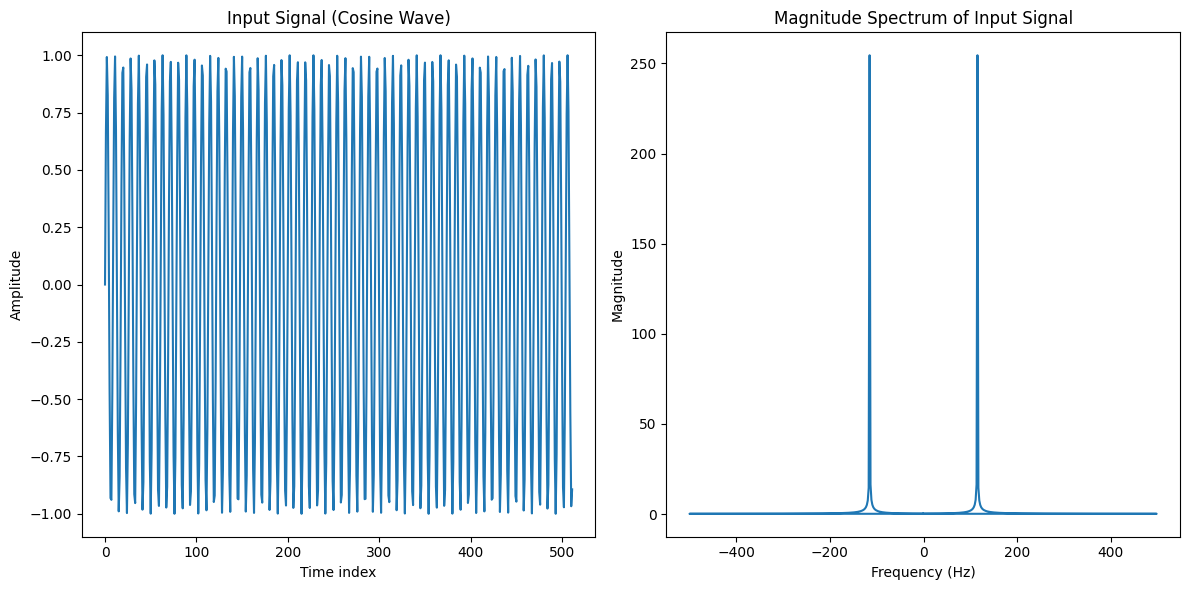

In [ ]:

x = np.array([1, 2, 3, 4])
magnitude_spectrum = gen_mag_spec(x)

print(magnitude_spectrum)

# More realistic signal
x_real = np.cos(2 * np.pi * 200.0 * np.arange(512) / 1000)

# Compute the magnitude spectrum for the realistic signal
magnitude_spectrum_r= gen_mag_spec(x_real)

freqs = np.fft.fftfreq(512, 1/1000)

# Find the index of the peak in the magnitude spectrum
peak_index = np.argmax(magnitude_spectrum_r)
peak_freq = np.abs(freqs[peak_index])  # Take the absolute value since the peak might be negative

# Output the peak frequency and the expected frequency
print(f"Peak frequency in magnitude spectrum: {peak_freq} Hz")

# Plotting the input signal and its magnitude spectrum
plt.figure(figsize=(12, 6))

# Plot the input signal (cosine wave)
plt.subplot(1, 2, 1)
plt.plot(x_real)
plt.title('Input Signal (Cosine Wave)')
plt.xlabel('Time index')
plt.ylabel('Amplitude')


# Plot the magnitude spectrum of the input signal
plt.subplot(1, 2, 2)
plt.plot(freqs, magnitude_spectrum_r)
plt.title('Magnitude Spectrum of Input Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

#As we know from the given formula the frequency of the cosine wave is 200 Hz, and the peak of the magnitude spectrum is at 200 Hz, which validates the result.

The first plot represents the cosine wave in the time domain. The waveform oscillates with a constant amplitude between -1 and 1, and its frequency is approximately 200 Hz.

The second plot represents the cosine wave in the frequency domain. A cosine wave always appears as two distinct peaks in the frequency domain. These peaks are located at the positive and negative frequencies of the wave. In this case, the peak frequencies are 199.21875 Hz and -199.21875 Hz, which closely correspond to the frequency of the cosine wave.

The magnitude of the spectral peaks is approximately 200, which reflects the amplitude of the cosine wave in the time domain. This is consistent with the Fourier Transform's seen in class.